In [ ]:
# !pip install lifelines

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import scipy.stats as sp
import seaborn as sns
import numpy as np
from lifelines import KaplanMeierFitter

In [123]:
# df = pd.read_csv("clinical_data/subset_cohort.csv",low_memory=False)
df = pd.read_csv("subset_cohort.csv",low_memory=False)

df.head()

,f.eid,f.31.0.0,f.34.0.0,f.52.0.0,f.84.0.0,f.84.0.1,f.84.0.2,f.84.0.3,f.84.0.4,f.84.0.5,...,f.42012.0.0,f.130706.0.0,f.130708.0.0,f.130710.0.0,f.130712.0.0,f.130714.0.0,f.131286.0.0,f.131294.0.0,f.132084.0.0,f.132085.0.0
0,1000047,Male,1943,July,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2010-06-28,NaN,NaN,NaN
1,1000050,Male,1958,October,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000068,Male,1942,October,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2017-05-30,NaN,NaN,2004-04-01,2017-05-30,NaN,NaN,NaN
3,1000094,Male,1952,September,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000145,Male,1945,September,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
colnames=['eid',
          'sex_f31_0_0','year_of_birth_f34_0_0',
'month_of_birth_f52_0_0','number_of_children_fathered_f2405_0_0',
 'diabetes_diagnosed_by_doctor_f2443_0_0',
 'cancer_diagnosed_by_doctor_f2453_0_0',
 'age_high_blood_pressure_diagnosed_f2966_0_0',
 'cancer_yearage_first_occurred_f84_0_0',
 'age_heart_attack_diagnosed_f3894_0_0',
 'age_diabetes_diagnosed_f2976_0_0',
 'cancer_code_selfreported_f20001_0_0',
 'interpolated_age_of_participant_when_cancer_first_diagnosed_f20007_0_0',
 'smoking_status_f20116_0_0',
 'body_mass_index_bmi_f21001_0_0',
 'date_of_death_f40000_0_0',
 'type_of_cancer_icd10_f40006_0_0',
 'age_at_death_f40007_0_0',
 'age_at_death_f40007_1_0',
 'age_at_cancer_diagnosis_f40008_0_0',
 'description_of_cause_of_death_f40010_0_0',
 'date_of_myocardial_infarction_f42000_0_0',
 'date_of_stemi_f42002_0_0',
 'date_of_nstemi_f42004_0_0',
 'date_of_stroke_f42006_0_0',
 'date_of_ischaemic_stroke_f42008_0_0',
 'date_n46_first_reported_male_infertility_f132084_0_0',
 'source_of_report_of_n46_male_infertility_f132085_0_0']

cols = ["f.eid","f.31.0.0","f.34.0.0","f.52.0.0",'f.2405.0.0',
 'f.2443.0.0',
 'f.2453.0.0',
 'f.2966.0.0',
 'f.84.0.0',
 'f.3894.0.0',
 'f.2976.0.0',
 'f.20001.0.0',
 'f.20007.0.0',
 'f.20116.0.0',
 'f.21001.0.0',
 'f.40000.0.0',
 'f.40006.0.0',
 'f.40007.0.0',
 'f.40007.1.0',
 'f.40008.0.0',
 'f.40010.0.0',
 'f.42000.0.0',
 'f.42002.0.0',
 'f.42004.0.0',
 'f.42006.0.0',
 'f.42008.0.0',
 'f.132084.0.0',
 'f.132085.0.0']

df = df[cols]
df.columns=colnames
df["infertile"]=df['date_n46_first_reported_male_infertility_f132084_0_0'].notnull()

df.head()

,eid,sex_f31_0_0,year_of_birth_f34_0_0,month_of_birth_f52_0_0,number_of_children_fathered_f2405_0_0,diabetes_diagnosed_by_doctor_f2443_0_0,cancer_diagnosed_by_doctor_f2453_0_0,age_high_blood_pressure_diagnosed_f2966_0_0,cancer_yearage_first_occurred_f84_0_0,age_heart_attack_diagnosed_f3894_0_0,...,age_at_cancer_diagnosis_f40008_0_0,description_of_cause_of_death_f40010_0_0,date_of_myocardial_infarction_f42000_0_0,date_of_stemi_f42002_0_0,date_of_nstemi_f42004_0_0,date_of_stroke_f42006_0_0,date_of_ischaemic_stroke_f42008_0_0,date_n46_first_reported_male_infertility_f132084_0_0,source_of_report_of_n46_male_infertility_f132085_0_0,infertile
0,1000047,Male,1943,July,0.0,No,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,1000050,Male,1958,October,2.0,No,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,1000068,Male,1942,October,2.0,Yes,No,62.0,NaN,NaN,...,69.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,1000094,Male,1952,September,2.0,No,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,1000145,Male,1945,September,2.0,No,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [125]:
infertile_df = df.loc[df["infertile"]]
fertile_df = df.loc[~df["infertile"]]
infertile_df.shape,fertile_df.shape

((456, 29), (181522, 29))

In [126]:
df.groupby(["infertile"]).mean()

,eid,year_of_birth_f34_0_0,number_of_children_fathered_f2405_0_0,age_high_blood_pressure_diagnosed_f2966_0_0,cancer_yearage_first_occurred_f84_0_0,age_heart_attack_diagnosed_f3894_0_0,age_diabetes_diagnosed_f2976_0_0,cancer_code_selfreported_f20001_0_0,interpolated_age_of_participant_when_cancer_first_diagnosed_f20007_0_0,body_mass_index_bmi_f21001_0_0,age_at_death_f40007_0_0,age_at_death_f40007_1_0,age_at_cancer_diagnosis_f40008_0_0
infertile,,,,,,,,,,,,,
False,3.513190e+06,1950.887931,1.752885,48.201365,1801.641253,51.538585,50.544395,1831.944239,54.178025,27.846765,69.853325,67.010811,61.420108
True,3.661175e+06,1954.945175,1.127193,46.373832,1547.025641,46.444444,46.352941,1039.564103,46.687179,27.810567,66.940000,NaN,53.958333


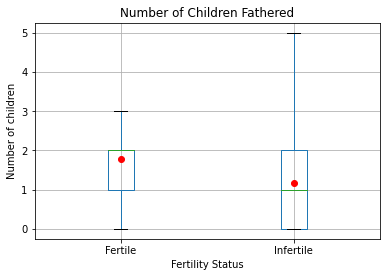

In [127]:
# plt.boxplot(list([infertile_df["number_of_children_fathered_f2405_0_0"].values,
#              fertile_df["number_of_children_fathered_f2405_0_0"].values]))
# plt.show()

child_df = df[["number_of_children_fathered_f2405_0_0","infertile"]].copy()
child_df["number_of_children_fathered_f2405_0_0"] = child_df["number_of_children_fathered_f2405_0_0"].replace({-3.0:np.nan,-1.0:np.nan})
child_df = child_df.dropna()

fig,ax = plt.subplots()
child_df.boxplot(column="number_of_children_fathered_f2405_0_0",by="infertile",showfliers=False,ax=ax,showmeans=True,
                 meanprops={"marker":"o",
                       "markerfacecolor":"red", 
                       "markeredgecolor":"red",
                      "markersize":"6"})
ax.set_title("Number of Children Fathered")
ax.set_ylabel("Number of children")
ax.set_xlabel("Fertility Status")
ax.set_xticklabels(["Fertile","Infertile"])
plt.suptitle("")
plt.show()

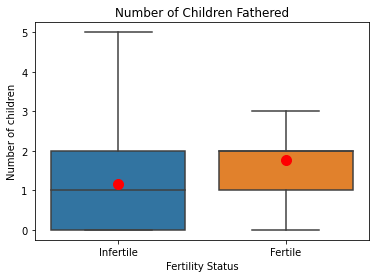

In [207]:
fig,ax = plt.subplots()
sns.boxplot(x="infertile",y="number_of_children_fathered_f2405_0_0",data=child_df, order=[True,False],
            showfliers=False,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"red", 
                       "markeredgecolor":"red",
                      "markersize":"10"},ax=ax)

plt.title("Number of Children Fathered")
plt.ylabel("Number of children")
plt.xlabel("Fertility Status")
ax.set_xticklabels(["Infertile","Fertile"])
plt.suptitle("")
plt.show()

In [197]:
print("Mean: ",child_df.groupby("infertile").mean(),"\n\nSTD: ",child_df.groupby("infertile").std())
sp.ttest_ind(child_df.loc[child_df["infertile"],"number_of_children_fathered_f2405_0_0"].values,
             child_df.loc[~child_df["infertile"],"number_of_children_fathered_f2405_0_0"].values,)

Mean:             number_of_children_fathered_f2405_0_0
infertile                                       
False                                   1.778829
True                                    1.163717 

STD:             number_of_children_fathered_f2405_0_0
infertile                                       
False                                   1.256018
True                                    1.292898


Ttest_indResult(statistic=-10.398017372627374, pvalue=2.573518493298454e-25)

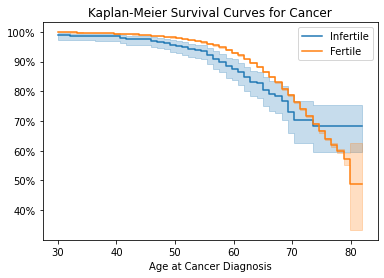

In [130]:
disease = "cancer"
Disease="Cancer"
variable = "age_at_cancer_diagnosis_f40008_0_0"

df[disease] = df[variable].notna()
df["age_"+disease] = 2016-df["year_of_birth_f34_0_0"]
df.loc[df[disease],"age_"+disease] = df.loc[df[disease].notna(),variable]

fig,ax = plt.subplots()
t=np.linspace(30,round(df["age_"+disease].max()))

kmf = KaplanMeierFitter()
kmf.fit(df.loc[df["infertile"],["age_"+disease]], event_observed=df.loc[df["infertile"],[disease]], timeline=t, label="Infertile")
ax = kmf.plot_survival_function()

kmf.fit(df.loc[~df["infertile"],["age_"+disease]], event_observed=df.loc[~df["infertile"],[disease]], timeline=t, label="Fertile")
ax = kmf.plot_survival_function()

plt.title("Kaplan-Meier Survival Curves for "+Disease)
plt.xlabel("Age at "+Disease+" Diagnosis")

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,decimals=None))

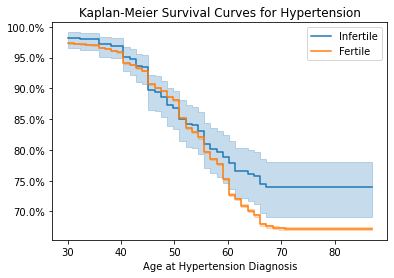

In [131]:
disease = "htn"
Disease="Hypertension"
variable = "age_high_blood_pressure_diagnosed_f2966_0_0"

df[disease] = df[variable].notna()
df["age_"+disease] = 2021-df["year_of_birth_f34_0_0"]
df.loc[df[disease],"age_"+disease] = df.loc[df[disease].notna(),variable]

fig,ax = plt.subplots()
t=np.linspace(30,round(df["age_"+disease].max()))

kmf = KaplanMeierFitter()
kmf.fit(df.loc[df["infertile"],["age_"+disease]], event_observed=df.loc[df["infertile"],[disease]], timeline=t, label="Infertile")
ax = kmf.plot_survival_function()

kmf.fit(df.loc[~df["infertile"],["age_"+disease]], event_observed=df.loc[~df["infertile"],[disease]], timeline=t, label="Fertile")
ax = kmf.plot_survival_function()

plt.title("Kaplan-Meier Survival Curves for "+Disease)
plt.xlabel("Age at "+Disease+" Diagnosis")

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,decimals=None))

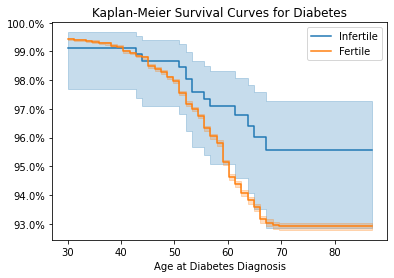

In [133]:
disease = "dm"
Disease="Diabetes"
variable = "age_diabetes_diagnosed_f2976_0_0"

df[disease] = df[variable].notna()
df["age_"+disease] = 2021-df["year_of_birth_f34_0_0"]
df.loc[df[disease],"age_"+disease] = df.loc[df[disease].notna(),variable]

fig,ax = plt.subplots()
t=np.linspace(30,round(df["age_"+disease].max()))

kmf = KaplanMeierFitter()
kmf.fit(df.loc[df["infertile"],["age_"+disease]], event_observed=df.loc[df["infertile"],[disease]], timeline=t, label="Infertile")
ax = kmf.plot_survival_function()

kmf.fit(df.loc[~df["infertile"],["age_"+disease]], event_observed=df.loc[~df["infertile"],[disease]], timeline=t, label="Fertile")
ax = kmf.plot_survival_function()

plt.title("Kaplan-Meier Survival Curves for "+Disease)
plt.xlabel("Age at "+Disease+" Diagnosis")

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,decimals=None))

In [153]:
# disease = "mi"
# Disease="Heart Attack"
# variable = "age_heart_attack_diagnosed_f3894_0_0"

# df[disease] = df[variable].notna()
# df["age_"+disease] = 2021-df["year_of_birth_f34_0_0"]
# df.loc[df[disease],"age_"+disease] = df.loc[df[disease].notna(),variable]

# fig,ax = plt.subplots()
# t=np.linspace(30,round(df["age_"+disease].max()))

# kmf = KaplanMeierFitter()
# kmf.fit(df.loc[df["infertile"],["age_"+disease]], event_observed=df.loc[df["infertile"],[disease]], timeline=t, label="Infertile")
# ax = kmf.plot_survival_function()

# kmf.fit(df.loc[~df["infertile"],["age_"+disease]], event_observed=df.loc[~df["infertile"],[disease]], timeline=t, label="Fertile")
# ax = kmf.plot_survival_function()

# plt.title("Kaplan-Meier Survival Curves for "+Disease)
# plt.xlabel("Age at "+Disease+" Diagnosis")

# ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,decimals=None))

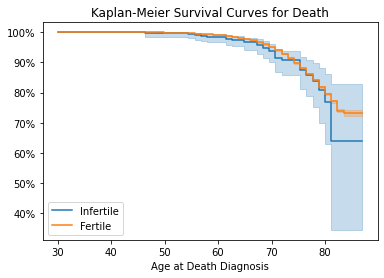

In [134]:
disease = "death"
Disease="Death"
variable = "age_at_death_f40007_0_0"

df[disease] = df[variable].notna()
df["age_"+disease] = 2021-df["year_of_birth_f34_0_0"]
df.loc[df[disease],"age_"+disease] = df.loc[df[disease].notna(),variable]

fig,ax = plt.subplots()
t=np.linspace(30,round(df["age_"+disease].max()))

kmf = KaplanMeierFitter()
kmf.fit(df.loc[df["infertile"],["age_"+disease]], event_observed=df.loc[df["infertile"],[disease]], timeline=t, label="Infertile")
ax = kmf.plot_survival_function()

kmf.fit(df.loc[~df["infertile"],["age_"+disease]], event_observed=df.loc[~df["infertile"],[disease]], timeline=t, label="Fertile")
ax = kmf.plot_survival_function()

plt.title("Kaplan-Meier Survival Curves for "+Disease)
plt.xlabel("Age at "+Disease+" Diagnosis")

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,decimals=None))

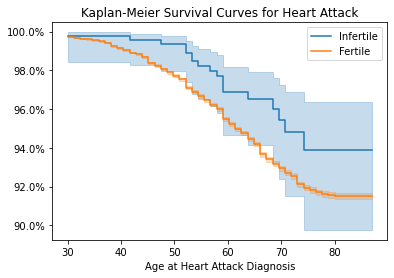

In [152]:
disease = "mi"
Disease="Heart Attack"
variable = "date_of_myocardial_infarction_f42000_0_0"

df[disease] = df[variable].notna()
df["age_"+disease] = 2021-df["year_of_birth_f34_0_0"]
df.loc[df[disease],"age_"+disease] = [int(x.split('-')[0])-df.iloc[i]["year_of_birth_f34_0_0"] for i,x in enumerate(df.loc[df[disease],variable])]

fig,ax = plt.subplots()
t=np.linspace(30,round(df["age_"+disease].max()))

kmf = KaplanMeierFitter()
kmf.fit(df.loc[df["infertile"],["age_"+disease]], event_observed=df.loc[df["infertile"],[disease]], timeline=t, label="Infertile")
ax = kmf.plot_survival_function()

kmf.fit(df.loc[~df["infertile"],["age_"+disease]], event_observed=df.loc[~df["infertile"],[disease]], timeline=t, label="Fertile")
ax = kmf.plot_survival_function()

plt.title("Kaplan-Meier Survival Curves for "+Disease)
plt.xlabel("Age at "+Disease+" Diagnosis")

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,decimals=None))
# df["age_mi"].hist()

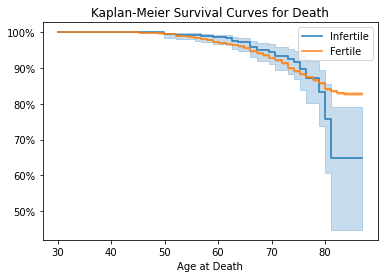

In [156]:
disease = "death"
Disease="Death"
variable = "date_of_death_f40000_0_0"

df[disease] = df[variable].notna()
df["age_"+disease] = 2021-df["year_of_birth_f34_0_0"]
df.loc[df[disease],"age_"+disease] = [int(x.split('-')[0])-df.iloc[i]["year_of_birth_f34_0_0"] for i,x in enumerate(df.loc[df[disease],variable])]

fig,ax = plt.subplots()
t=np.linspace(30,round(df["age_"+disease].max()))

kmf = KaplanMeierFitter()
kmf.fit(df.loc[df["infertile"],["age_"+disease]], event_observed=df.loc[df["infertile"],[disease]], timeline=t, label="Infertile")
ax = kmf.plot_survival_function()

kmf.fit(df.loc[~df["infertile"],["age_"+disease]], event_observed=df.loc[~df["infertile"],[disease]], timeline=t, label="Fertile")
ax = kmf.plot_survival_function()

plt.title("Kaplan-Meier Survival Curves for "+Disease)
plt.xlabel("Age at "+Disease)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,decimals=None))
# df["age_mi"].hist()

In [154]:
# [int(x.split('-')[0]) for x in df.loc[df["date_of_myocardial_infarction_f42000_0_0"].notna(),"date_of_myocardial_infarction_f42000_0_0"]]#.split("-")#.sum()#,df["age_heart_attack_diagnosed_f3894_0_0"].notna().sum()

# # df.columns

In [76]:
df.groupby("infertile")[["cancer","htn","mi","dm","death"]].mean()

,cancer,htn,mi,dm,death
infertile,,,,,
False,0.175477,0.304222,0.041119,0.064775,0.088474
True,0.157895,0.234649,0.019737,0.037281,0.065789


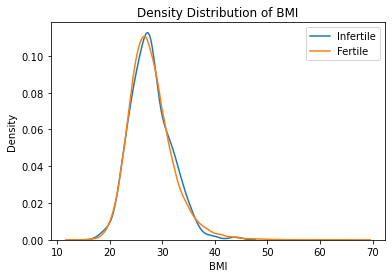

In [171]:
# this is to plot the kde
sns.kdeplot(df.loc[df["infertile"],"body_mass_index_bmi_f21001_0_0"],label='Infertile');
sns.kdeplot(df.loc[~df["infertile"],"body_mass_index_bmi_f21001_0_0"],label='Fertile');

# beautifying the labels
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title("Density Distribution of BMI")
plt.legend()
plt.show()

In [ ]:
# diabetes_diagnosed_by_doctor_f2443_0_0
# cancer_diagnosed_by_doctor_f2453_0_0

# cancer_code_selfreported_f20001_0_0
# smoking_status_f20116_0_0
# body_mass_index_bmi_f21001_0_0
# date_of_death_f40000_0_0
# type_of_cancer_icd10_f40006_0_0
# 
# description_of_cause_of_death_f40010_0_0
# type_of_cancer_icd9_f40013_0_0
# date_of_myocardial_infarction_f42000_0_0
# date_of_stemi_f42002_0_0
# date_of_nstemi_f42004_0_0
# date_of_stroke_f42006_0_0
# date_of_ischaemic_stroke_f42008_0_0
# date_n46_first_reported_male_infertility_f132084_0_0
# source_of_report_of_n46_male_infertility_f132085_0_0

In [ ]:
# number_of_children_fathered_f2405_0_0
# diabetes_diagnosed_by_doctor_f2443_0_0
# cancer_diagnosed_by_doctor_f2453_0_0
# age_high_blood_pressure_diagnosed_f2966_0_0
# cancer_yearage_first_occurred_f84_0_0
# age_heart_attack_diagnosed_f3894_0_0
# age_diabetes_diagnosed_f2976_0_0
# cancer_code_selfreported_f20001_0_0
# interpolated_age_of_participant_when_cancer_first_diagnosed_f20007_0_0
# smoking_status_f20116_0_0
# body_mass_index_bmi_f21001_0_0
# date_of_death_f40000_0_0
# type_of_cancer_icd10_f40006_0_0
# age_at_death_f40007_0_0
# age_at_death_f40007_1_0
# age_at_cancer_diagnosis_f40008_0_0
# description_of_cause_of_death_f40010_0_0
# type_of_cancer_icd9_f40013_0_0
# date_of_myocardial_infarction_f42000_0_0
# date_of_stemi_f42002_0_0
# date_of_nstemi_f42004_0_0
# date_of_stroke_f42006_0_0
# date_of_ischaemic_stroke_f42008_0_0
# date_n46_first_reported_male_infertility_f132084_0_0
# source_of_report_of_n46_male_infertility_f132085_0_0